# **Tensorflow/Keras 기반의 CNN 모델을 이용한 MNIST**

## **1. 패키지(라이브러리) 불러오기**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.datasets import mnist

## **2. 학습 데이터 및 평가 데이터 읽어오기**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## **3. 데이터 준비하기**

In [3]:
# Change the shape of the tensor
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

# Normalize values
X_train = X_train.astype("float32")/255

# One hot encode Y
y_train = to_categorical(y_train)


## **4. 모델 정의**

- 원하는 레이어를 선택하여 모델 구성하기

In [4]:
# build model with Keras's Sequential API
model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # first layer is a 2D conv layer with a 3x3 kernel
                    MaxPooling2D((2,2)), # downsampling layer
                    Flatten(), # flatten the tensor
                    Dense(100, activation='relu'), # Dense layer with 100 nodes
                    Dense(10, activation="softmax") # final layer 10 nodes - for each possible number
                    ])

- 최적화 함수, 손실함수, 측정(모니터링)변수를 설정하여 모델 컴파일하기

In [5]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## **5. 모델 학습**

In [6]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.2223 - accuracy: 0.9322
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0696 - accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0464 - accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0338 - accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0251 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0177 - accuracy: 0.9946
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0127 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0099 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0074 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 37s 20m

## **6. 모델 평가**

1/1 [==============================] - 0s 86ms/step


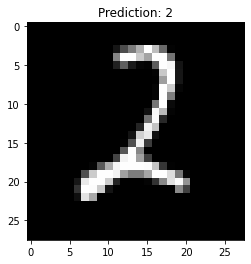

In [7]:
# pick random image from test set
img = random.choice(X_test)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.title(f"Prediction: {np.argmax(model.predict((img.reshape((1, 28, 28, 1)).astype('float32'))/255)[0], axis=-1)}")
plt.show()